In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"Marketing campaign dataset.csv")
data

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72607,3567,11,2022-11-28,4,Google Ads,15605,NaN,NaN,#The X Factor - Fashion for the Fearless,NaN,...,1,4.858090,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,chic jewelry
72608,3567,12,2022-11-29,128,Facebook Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,3.536262,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,statement pins
72609,3567,13,2022-11-30,128,Facebook Ads,15605,NaN,NaN,#The Power of X,NaN,...,1,1.947816,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,bridal jewelry
72610,3567,14,2022-12-01,4,Google Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,1.711467,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,jewelry sets


In [3]:
#columns in dataset 
data.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [4]:
data.isnull().sum()

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [7]:
# Calculate the total count of missing values for each variable
missing_values=data.isna().sum()
missing_values
# Calculate the percentage of missing values for each variable
percentage_missing=(missing_values*100)/data.isnull().count()
percentage_missing=percentage_missing.round()
percentage_missing

campaign_item_id         0.0
no_of_days               0.0
time                     0.0
ext_service_id           0.0
ext_service_name         0.0
creative_id              0.0
creative_width           5.0
creative_height          5.0
search_tags              0.0
template_id              5.0
landing_page             0.0
advertiser_id            0.0
advertiser_name          0.0
network_id               0.0
approved_budget          1.0
advertiser_currency      0.0
channel_id               0.0
channel_name             0.0
max_bid_cpm             90.0
network_margin           0.0
campaign_budget_usd      0.0
impressions              0.0
clicks                   0.0
stats_currency           0.0
currency_code            0.0
exchange_rate            0.0
media_cost_usd           0.0
position_in_content    100.0
unique_reach           100.0
total_reach            100.0
search_tag_cat           0.0
cmi_currency_code        0.0
timezone                 0.0
weekday_cat              0.0
keywords      

In [8]:
# Create a DataFrame to store the missing data information and # Sort the DataFrame based on the total count of missing values in descending order
missing_data=pd.DataFrame({"Total":missing_values,"Percentage of Missing Values": percentage_missing,"Type":data.dtypes})
missing_data=missing_data.sort_values(by="Total",ascending=False)
missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.0,float64
total_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
exchange_rate,0,0.0,int64
clicks,0,0.0,int64


In [9]:
# filling missing values with 0
data["creative_width"].fillna(0,inplace=True)
data["creative_height"].fillna(0,inplace=True)
data["template_id"].fillna(0,inplace=True)
data["approved_budget"].fillna(0,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       72612 non-null  float64
 7   creative_height      72612 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          72612 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72612 non-null  float64
 15  advertiser_currency  72612 non-null 

In [11]:
#CTR(Click-Through Rate) add new Column
data["CTR"]=(data['clicks']/data['impressions']*100)
data["CTR"]

0        0.955795
1        1.670463
2        1.498829
3        2.062742
4        1.300390
           ...   
72607    5.288008
72608    4.739884
72609    3.250774
72610    3.039514
72611    2.333333
Name: CTR, Length: 72612, dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       72612 non-null  float64
 7   creative_height      72612 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          72612 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72612 non-null  float64
 15  advertiser_currency  72612 non-null 

In [13]:
# as time column is object so convert it to datetime
data['time']=pd.to_datetime(data['time'])
data['time']


0       2022-05-01
1       2022-05-02
2       2022-05-03
3       2022-05-04
4       2022-05-05
           ...    
72607   2022-11-28
72608   2022-11-29
72609   2022-11-30
72610   2022-12-01
72611   2022-12-02
Name: time, Length: 72612, dtype: datetime64[ns]

In [14]:
data['spent_budget_per_day']=data['campaign_budget_usd']/data['no_of_days']
data['spent_budget_per_day']

0        93.167702
1        81.521739
2        72.463768
3        65.217391
4        59.288538
           ...    
72607    27.875963
72608    25.552966
72609    23.587353
72610    21.902542
72611    20.442373
Name: spent_budget_per_day, Length: 72612, dtype: float64

In [15]:
# Split the data into features (X) and target variable (y)

X = data[['clicks', 'impressions','campaign_budget_usd','no_of_days','ext_service_id',
          'media_cost_usd','advertiser_id','network_id','approved_budget','channel_id']]
y = data['CTR']
print(X)
print(y)

       clicks  impressions  campaign_budget_usd  no_of_days  ext_service_id  \
0           8          837           652.173913           7             128   
1          44         2634           652.173913           8              16   
2          32         2135           652.173913           9             128   
3          48         2327           652.173913          10             128   
4          20         1538           652.173913          11               4   
...       ...          ...                  ...         ...             ...   
72607      56         1059           306.635594          11               4   
72608      41          865           306.635594          12             128   
72609      21          646           306.635594          13             128   
72610      20          658           306.635594          14               4   
72611      14          600           306.635594          15              16   

       media_cost_usd  advertiser_id  network_id  a

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Regressor model's Mean Absolute Error: 0.02485181719069049
Random Forest Regressor model's Mean Squared Error: 0.2750632527412501
Random Forest Regressor model's R-squared: 0.9712519070659927


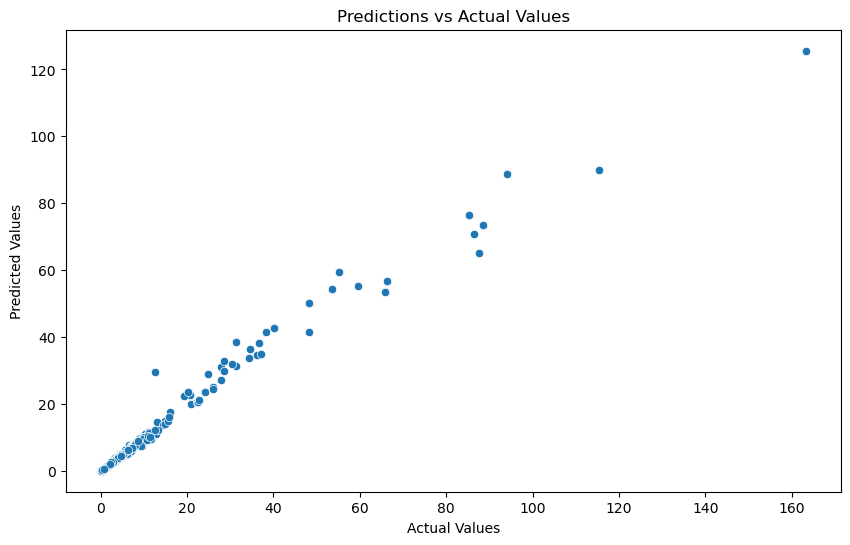

In [17]:

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Random Forest Regressor model's Mean Absolute Error: {mae}")
print(f"Random Forest Regressor model's Mean Squared Error: {mse}")
print(f"Random Forest Regressor model's R-squared: {r2}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [18]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

R-squared: 0.9712519070659927
Mean Squared Error: 0.2750632527412501
Mean Squared Error: 0.2750632527412501
R-squared: 97.13%


In [19]:
# Print the first few predictions and actual values for Random Forest Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   2.991870
50506  0.740741   0.740741
48085  1.607143   1.607143
37312  1.899827   1.899827
55413  1.147228   1.147228


In [20]:
X

,clicks,impressions,campaign_budget_usd,no_of_days,ext_service_id,media_cost_usd,advertiser_id,network_id,approved_budget,channel_id
0,8,837,652.173913,7,128,14.058514,4756,190,400.0,32
1,44,2634,652.173913,8,16,99.633496,4756,190,400.0,8
2,32,2135,652.173913,9,128,109.419677,4756,190,400.0,8
3,48,2327,652.173913,10,128,115.209499,4756,190,400.0,64
4,20,1538,652.173913,11,4,66.990104,4756,190,400.0,32
...,...,...,...,...,...,...,...,...,...,...
72607,56,1059,306.635594,11,4,4.858090,6304,353,442054.0,32
72608,41,865,306.635594,12,128,3.536262,6304,353,442054.0,4
72609,21,646,306.635594,13,128,1.947816,6304,353,442054.0,64
72610,20,658,306.635594,14,4,1.711467,6304,353,442054.0,8


In [21]:
y

0        0.955795
1        1.670463
2        1.498829
3        2.062742
4        1.300390
           ...   
72607    5.288008
72608    4.739884
72609    3.250774
72610    3.039514
72611    2.333333
Name: CTR, Length: 72612, dtype: float64

In [22]:
import pickle

In [23]:
input_data=[44,2634,652.173913,8,16,99.633496,4756,190,400.0,8] #2  ans 1.670
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)
prediction=rf_regressor.predict(input_data_reshape)
print(f"The CTR for given Data is : " ,prediction)

[[  44.       2634.        652.173913    8.         16.         99.633496
  4756.        190.        400.          8.      ]]
The CTR for given Data is :  [1.67817594]


In [24]:
filename="trained_model11.sav"
pickle.dump(rf_regressor,open(filename,'wb'))

In [25]:
loaded_model=pickle.load(open("trained_model11.sav","rb"))
input_data=[44,2634,652.173913,8,16,99.633496,4756,190,400.0,8]                                   #2  ans 1.670
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)
prediction=loaded_model.predict(input_data_reshape)
print(f"The CTR for given Data is : " ,prediction)

[[  44.       2634.        652.173913    8.         16.         99.633496
  4756.        190.        400.          8.      ]]
The CTR for given Data is :  [1.67817594]
